In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np

scenario = 'no_restricted'

# save('myData.mat','vhist','zhist','vphist','zphist','hist_pos','T', "ktime", "time_hist")
mat = spio.loadmat('12vehicles/myData.mat', squeeze_me=True)

In [4]:

print(type(mat))
vhist = mat['vhist']  # structures need [()]
vphist = mat['vphist']
hist_pos = mat['hist_pos']
zhist = mat['zhist']
zphist = mat['zphist']
ktime = mat['ktime']
time_hist = mat['time_hist']
T_total = mat['End']
#  ----------------------------------------------------------------------------
horizon = hist_pos.shape[1]
robots = hist_pos.shape[0]
index_array =['robot ' + str(i+1) for i in range(robots)]


<class 'dict'>


In [5]:

df_vel = pd.DataFrame(vhist[:,:-1], columns = np.arange(1,horizon))
df_zel= pd.DataFrame(zhist[:,:-1], columns = np.arange(1,horizon))
df_pos = pd.DataFrame(hist_pos[:,:-1], columns = np.arange(1,horizon))
df_time = pd.DataFrame(time_hist, columns = np.arange(1,horizon))
df_vel['agent'] = index_array
df_zel['agent'] = index_array
df_pos['agent'] = index_array
df_time['agent'] = index_array

# print('df_time', df_time)
# print(df_vel)


In [6]:
vel_melt = df_vel.melt(id_vars=['agent'], var_name='k', value_name='Vel')
zel_melt = df_zel.melt(id_vars=['agent'], var_name='k', value_name='Zel')
pos_melt = df_pos.melt(id_vars=['agent'], var_name='k', value_name='Pos')
time_melt = df_time.melt(id_vars=['agent'], var_name='k', value_name='d_time')
df_data = vel_melt.merge(zel_melt, on=['agent', 'k'], how='inner') \
                .merge(pos_melt, on=['agent', 'k'], how='inner')\
                .merge(time_melt, on=['agent', 'k'], how='inner')
df_data

,agent,k,Vel,Zel,Pos,d_time
0,robot 1,1,10.0,6,0.000000,1.647509
1,robot 2,1,20.0,1,-40.000000,0.095979
2,robot 3,1,10.0,3,-10.000000,0.119274
3,robot 4,1,20.0,5,-10.000000,0.197487
4,robot 5,1,10.0,2,-30.000000,0.174315
...,...,...,...,...,...,...
595,robot 8,50,30.0,3,298.944444,0.099479
596,robot 9,50,20.0,2,204.000000,0.062989
597,robot 10,50,50.0,5,490.400000,0.037299
598,robot 11,50,15.0,1,166.000000,0.059325



df_data

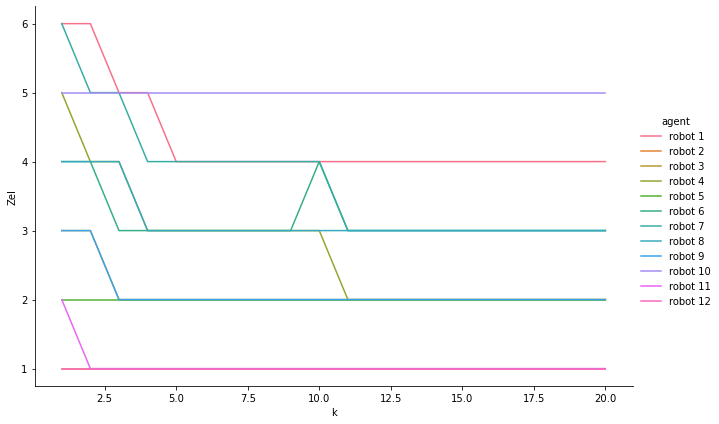

In [7]:
# tiempos = database[]
# fig1 = plt.figure(figsize=(6, 10))
sns.relplot( x = 'k', y= 'Zel' ,data = df_data[df_data['k']<= 20], kind='line' , hue = 'agent', height = 6, aspect = 1.5)
plt.savefig(f"Images\\{scenario}_trajectories.eps", format='eps')
plt.show()

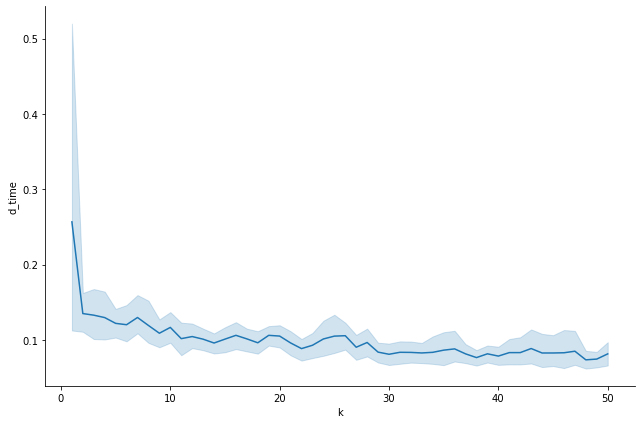

In [6]:
sns.relplot( x = 'k', y= 'd_time' ,data = df_data, kind='line' , height = 6, aspect = 1.5)
plt.savefig(f"Images\\{scenario}_d_time.svg", format='svg')
plt.show()

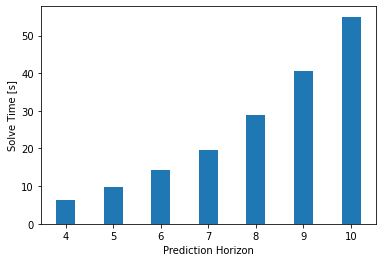

In [7]:
range_horizon = [4,5,6,7,8,9,10]
range_vehicles = [2,3,4,5,6,7,8,9,10,11,12]

# time of whole time vs horizon
sim_time = []
k_time = []
for i in range_horizon:
    mat = spio.loadmat(f'11vehicles/datasave/data_11v_{i}N.mat', squeeze_me=True)
    sim_time.append(mat['End'])
    k_time.append(mat['ktime'])

fig = plt.figure()

# creating the bar plot
plt.bar(range_horizon, sim_time, width = 0.4)
plt.xlabel("Prediction Horizon")
plt.ylabel("Solve Time [s]")
# plt.title("Students enrolled in different courses")
plt.savefig(f"Images\\{scenario}_solve_time.svg", format='svg')
plt.show()
# sim_time

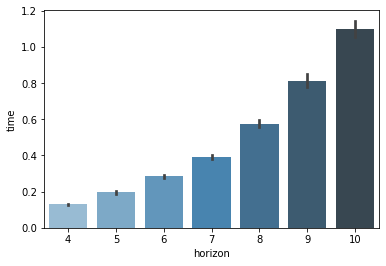

In [8]:
df_ktime = pd.DataFrame(k_time)
df_ktime['horizon'] = range_horizon
ktime_melt = df_ktime.melt(id_vars=['horizon'], var_name='k', value_name='time')
ktime_melt
sns.barplot(x="horizon", y="time", data=ktime_melt, palette='Blues_d')
# , height = 6, aspect = 1.5)
plt.savefig(f"Images\\{scenario}_horizon_time.svg", format='svg')
plt.show()

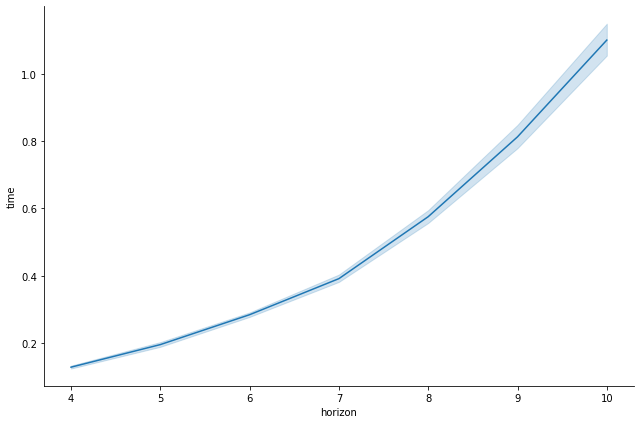

In [9]:
sns.relplot( x="horizon", y="time", data=ktime_melt, kind='line', height = 6, aspect = 1.5)
plt.savefig(f"Images\\{scenario}_horizon_time2.svg", format='svg')

plt.show()

In [10]:
# plot descentraliced and centralized times
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=1)

agent
robot 1     0.144347
robot 10    0.050629
robot 11    0.068552
robot 12    0.088341
robot 2     0.069399
robot 3     0.106107
robot 4     0.110154
robot 5     0.115415
robot 6     0.136840
robot 7     0.111990
robot 8     0.092834
robot 9     0.101262
dtype: float64

In [11]:
df_data.pivot_table(index='agent', values ='d_time', columns='k').mean(axis=0)

k
1     0.256826
2     0.135135
3     0.133010
4     0.129815
5     0.122150
6     0.120338
7     0.129931
8     0.119359
9     0.109051
10    0.116759
11    0.101863
12    0.104629
13    0.101147
14    0.096062
15    0.101219
16    0.106272
17    0.101550
18    0.096361
19    0.106244
20    0.105272
21    0.096159
22    0.088634
23    0.093081
24    0.101449
25    0.105202
26    0.105767
27    0.090464
28    0.096762
29    0.083981
30    0.081139
31    0.083745
32    0.083598
33    0.082876
34    0.083711
35    0.086591
36    0.088275
37    0.081676
38    0.076727
39    0.081734
40    0.078727
41    0.083322
42    0.083330
43    0.088743
44    0.082818
45    0.082840
46    0.083124
47    0.085176
48    0.073738
49    0.074752
50    0.081646
dtype: float64

In [12]:
range_horizon = [4, 5, 6, 7, 8, 9, 10]
range_vehicles = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

time = []
k_time = []
for i in range_horizon:

    sim_time = []
    simk_time = []
    for j in range_vehicles:
        mat = spio.loadmat(f'{j}vehicles/datasave/data_{j}v_{i}N.mat', squeeze_me=True)
        sim_time.append(mat['End'])
        mean_time = np.mean(mat['ktime'])
        simk_time.append(mean_time)
    time.append(sim_time)
    k_time.append((simk_time))


In [13]:
df_time = pd.DataFrame(time, columns=range_vehicles)
df_time['Horizon'] = range_horizon
time_melt = df_time.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# time_melt
df_ktime_mean = pd.DataFrame(k_time)
df_ktime_mean['Horizon'] = range_horizon
k_time_melt = df_ktime_mean.melt(id_vars=['Horizon'], var_name='NumberVehicles', value_name='time')
# k_time_melt

In [14]:
time_melt

,Horizon,NumberVehicles,time
0,4,2,0.745223
1,5,2,0.620022
2,6,2,0.747861
3,7,2,0.773807
4,8,2,0.902052
...,...,...,...
72,6,12,15.746778
73,7,12,23.546600
74,8,12,32.733478
75,9,12,43.962701


In [15]:
times_simulation = time_melt.merge(k_time_melt, on=['Horizon', 'NumberVehicles'], how='inner', suffixes=('_Centralized', '_Descentralized'))
times_simulation

,Horizon,NumberVehicles,time_Centralized,time_Descentralized
0,4,2,0.745223,0.046191
1,5,2,0.620022,0.060998
2,6,2,0.747861,0.080467
3,7,2,0.773807,0.105320
4,8,2,0.902052,0.139435
...,...,...,...,...
58,6,10,13.132301,0.314934
59,7,10,18.758596,0.470930
60,8,10,26.897242,0.654668
61,9,10,37.546120,0.879252


In [16]:
times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')

,Horizon,NumberVehicles,Method,time
0,4,2,time_Centralized,0.745223
1,5,2,time_Centralized,0.620022
2,6,2,time_Centralized,0.747861
3,7,2,time_Centralized,0.773807
4,8,2,time_Centralized,0.902052
...,...,...,...,...
121,6,10,time_Descentralized,0.314934
122,7,10,time_Descentralized,0.470930
123,8,10,time_Descentralized,0.654668
124,9,10,time_Descentralized,0.879252


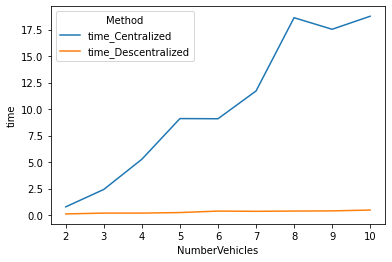

In [17]:
plot_data = times_simulation.melt(id_vars=['Horizon', 'NumberVehicles'], var_name='Method', value_name='time')
sns.lineplot(x='NumberVehicles', y='time', data = plot_data[plot_data['Horizon']==7], hue='Method' )
# plt.savefig(f"Images\\{scenario}_n_vehicles.svg", format='svg')
plt.show()

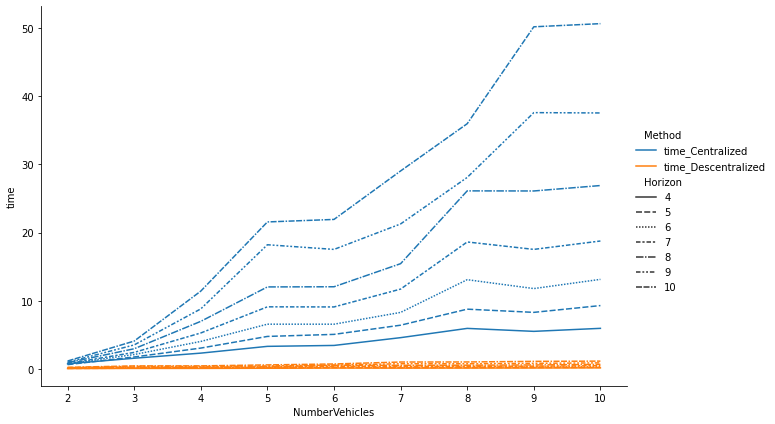

In [18]:
sns.relplot( x = 'NumberVehicles', y= 'time' ,data = plot_data, kind='line' , hue = 'Method', style="Horizon", height = 6, aspect = 1.5)
plt.savefig(f"Images\\{scenario}_d_time.svg", format='svg')

plt.show()